<b> Nama  : Rahma Fadhila Moenggah <br>
<b> NIM   : 1301180050 <br>
<b> Kelas : IF-42-02

**Formulasi Masalah** <br>
Akan dilakukan clusterisasi untuk memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di suatu dealer pada dataset kendaraan. Sumber data yang digunakan yaitu “kendaraan_train.csv” yang dimana terdapat 12 kolom serta 285831 baris.

In [ ]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np 
import seaborn as sns
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import random
import copy
sns.set(color_codes=True)

In [ ]:
# Dictionary warna untuk melakukan visualisasi
colmap = {1: 'aquamarine', 2: 'mediumorchid', 3: 'cornflowerblue',
          4: 'lightcoral', 5: 'pink', 6: 'blue',
          7: 'brown', 8: 'gray', 9: 'orange', 10:'red'}

# **Explorasi & Teknik Persiapan Data**

In [ ]:
# Membaca file dataset yang akan digunakan menggunakan library pandas
data_train = pd.read_csv('kendaraan_train.csv')
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
# Cek info data untuk mengetahui tipe atribut data dan yang memiliki data NaN
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Karena, column id tidak ada pengaruh untuk memprediksi ketertarikan. Lalu untuk column tertarik adalah sebuah label target, untuk clustering ini tidak digunakan.

In [ ]:
# Menghapus column id dan tertarik dari dataset
data_train = data_train.drop('id', axis=1)
data_train = data_train.drop('Tertarik', axis=1)

## **Missing Value**

Sebelum melakukan pemilihan atribut data yang akan digunakan untuk clustering, dilakukan cek missing value. Pada hasil dibawah, terlihat adanya missing value pada atribut data yang akan digunakan, sehingga perlu dilakukan treatment.

In [ ]:
# Cek missing value dari masing-masing atribut
total = data_train.isnull().sum().sort_values(ascending=True)
print(total)

Lama_Berlangganan    13992
Kendaraan_Rusak      14188
Umur                 14214
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kanal_Penjualan      14299
Kode_Daerah          14306
SIM                  14404
Jenis_Kelamin        14440
Premi                14569
dtype: int64


## **Nilai Skewness**

Sebelum mengisi nilai missing value dan melakukan replace data NaN, dicek terlebih dahulu nilai skewnessnya, untuk menentukan teknik pengisian missing value yang tepat.

In [ ]:
# Cek nilai skewness untuk mengetahui nilai yang akan digunakan mean atau median
x = ['Umur','Kode_Daerah','Sudah_Asuransi','Premi','Kanal_Penjualan','Lama_Berlangganan']
data_train[x].skew(axis=0, skipna=True)

Umur                 0.671077
Kode_Daerah         -0.116322
Sudah_Asuransi       0.165452
Premi                1.656493
Kanal_Penjualan     -0.899909
Lama_Berlangganan    0.003858
dtype: float64

## **Handling Empty Data**

Setelah menemukan teknik yang tepat untuk mengisi data NaN dengan mean. Lalu untuk atribut data yang bertipe object, saya melakukan replace data NaN menjadi 0 dan mengubah tipe data object menjadi float.

In [ ]:
# Mengubah data NaN dan tipe data
data_train['Jenis_Kelamin'].replace(np.nan, 0,inplace=True) #Replace data NaN menjadi 0 
data_train['Jenis_Kelamin'].replace('Wanita', '0',inplace=True)
data_train['Jenis_Kelamin'].replace('Pria', '1',inplace=True)
data_train['Jenis_Kelamin'] = data_train['Jenis_Kelamin'].astype('float')

data_train['Umur_Kendaraan'].replace(np.nan, 0,inplace=True) #Replace data NaN menjadi 0
data_train['Umur_Kendaraan'].replace('< 1 Tahun', '0',inplace=True)
data_train['Umur_Kendaraan'].replace('1-2 Tahun', '1',inplace=True)
data_train['Umur_Kendaraan'].replace('> 2 Tahun', '2',inplace=True)
data_train['Umur_Kendaraan'] = data_train['Umur_Kendaraan'].astype('float')

data_train['Kendaraan_Rusak'].replace(np.nan, 0, inplace=True) #Replace data NaN menjadi 0
data_train['Kendaraan_Rusak'].replace('Tidak', '0',inplace=True)
data_train['Kendaraan_Rusak'].replace('Pernah', '1',inplace=True)
data_train['Kendaraan_Rusak'] = data_train['Kendaraan_Rusak'].astype('float')


# Karena nilai skewness dataset tersebut normal yaitu berada pada skala -2 sampai dengan 2, maka data NaN diisi dengan mean
avg_umur = data_train['Umur'].mean(axis=0)
data_train['Umur'].replace(np.nan, avg_umur, inplace=True)

avg_sim = data_train['SIM'].mean(axis=0)
data_train['SIM'].replace(np.nan, avg_sim, inplace=True)

avg_kode = data_train['Kode_Daerah'].mean(axis=0)
data_train['Kode_Daerah'].replace(np.nan, avg_kode, inplace=True)

avg_asuransi = data_train['Sudah_Asuransi'].mean(axis=0)
data_train['Sudah_Asuransi'].replace(np.nan, avg_asuransi, inplace=True)

avg_premi = data_train['Premi'].mean(axis=0)
data_train['Premi'].replace(np.nan, avg_premi, inplace=True)

avg_kanal = data_train['Kanal_Penjualan'].mean(axis=0)
data_train['Kanal_Penjualan'].replace(np.nan, avg_kanal, inplace=True)

avg_lama = data_train['Lama_Berlangganan'].mean(axis=0)
data_train['Lama_Berlangganan'].replace(np.nan, avg_lama, inplace=True)

In [ ]:
# Cek missing value untuk memastikan proses yang telah dilakukan sebelumnya
data_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
# sns.pairplot(data_train, hue='Tertarik');

## **Feature Correlation**

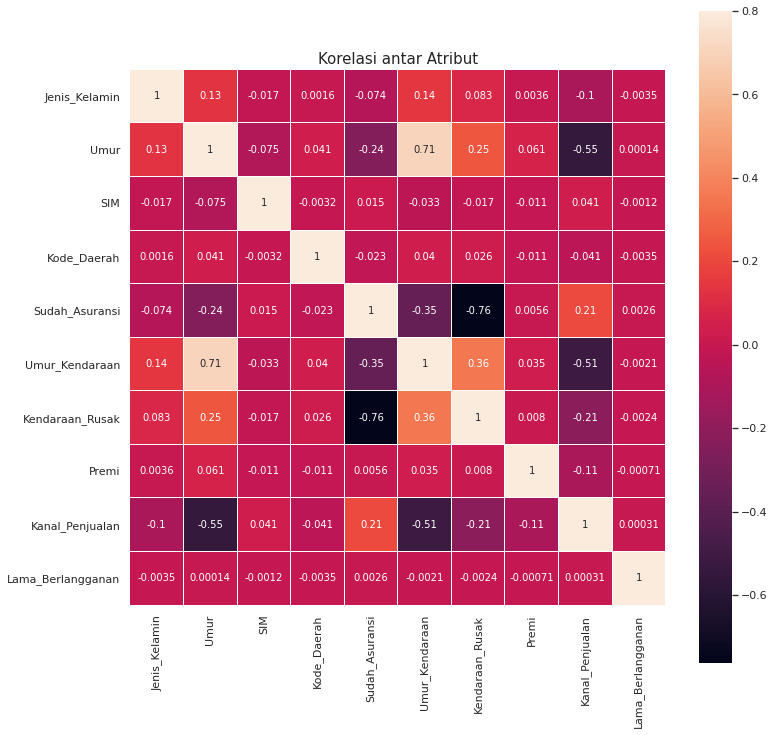

In [ ]:
# Sebelum mengambil dua atribut yang akan dicluster maka lihat dahulu nilai korelasi antar atribut pada dataset
corr = data_train.corr()
plt.figure(figsize=(12, 12))
sns.color_palette(as_cmap=True)
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True)
plt.title('Korelasi antar Atribut', y=1, size=15)
plt.show()

## **Feature Selection**

In [ ]:
# Mengambil atribut data dan masukkan kedalam variable
data = data_train[['Umur', 'Premi']]

# Mengambil variable dan masukkan kedalam dataframe
cluster = pd.DataFrame(data)
cluster

,Umur,Premi
0,30.0,28029.0
1,48.0,25800.0
2,21.0,32733.0
3,58.0,2630.0
4,50.0,34857.0
...,...,...
285826,23.0,25988.0
285827,21.0,44686.0
285828,23.0,49751.0
285829,68.0,30503.0


## **Cleansing Data**

### **Outlier Detection**

Setelah menentukan fitur yang digunakan, data dari 2 fitur tersebut mungkin saja memiliki outlier yang mana akan mengganggu dalam proses selanjutnya. Maka dari itu, perlu dilakukan pengecekan outlier pada data dari kedua fitur.

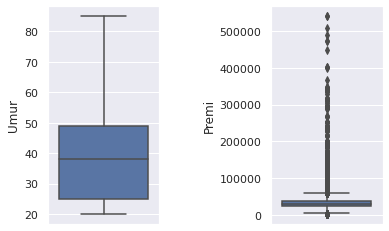

In [ ]:
# Melakukan cek outlier
f, axes = plt.subplots(1, 2)
sns.boxplot(y=cluster['Umur'], ax=axes[0])
sns.boxplot(y=cluster['Premi'], ax=axes[1])
plt.subplots_adjust(wspace=1)

### **Handling Outlier**

Karena pada fitur Premi terlihat adanya keberadaan outlier, maka dilakukan handling outlier untuk mengurangi keberadaan outlier ini dengan menggunakan Interquartile Range Method. Metode ini menggunakan nilai quartil 1, 2 dan 3 yang akan membagi sebuah urutan data menjadi empat bagian.

In [ ]:
# INTERQUARTILE RANGE METHOD

while True:
  # Calculate interquartile range
  Premi_q25, Premi_q75 = np.percentile(cluster['Premi'], 25), np.percentile(cluster['Premi'], 75) 
  Premi_iqr = Premi_q75 - Premi_q25

  # Calculate the outlier
  Premi_lower = Premi_q25 - (1.5 * Premi_iqr) 
  Premi_upper = Premi_q75 + (1.5 * Premi_iqr)

  # Identify outliers
  Premi_out = cluster[(cluster['Premi'] < (Premi_lower)) | (cluster['Premi'] > (Premi_upper))]

  # Amount oulier data
  print('Amount of Outlier Premi', Premi_out.shape[0])
  index_out = Premi_out.index
  cluster.drop(index_out, inplace=True) # Drop outlier data
  if (Premi_out.shape[0] <= 0):
    break

Amount of Outlier Premi 55141
Amount of Outlier Premi 3626
Amount of Outlier Premi 1173
Amount of Outlier Premi 385
Amount of Outlier Premi 133
Amount of Outlier Premi 52
Amount of Outlier Premi 19
Amount of Outlier Premi 13
Amount of Outlier Premi 2
Amount of Outlier Premi 0


In [ ]:
while True:
  # Calculate interquartile range
  Umur_q25, Umur_q75 = np.percentile(cluster['Umur'], 25), np.percentile(cluster['Umur'], 75) 
  Umur_iqr = Umur_q75 - Umur_q25

  # Calculate the outlier
  Umur_lower = Umur_q25 - (1.5 * Umur_iqr) 
  Umur_upper = Umur_q75 + (1.5 * Umur_iqr)

  # Identify outliers
  Umur_out = cluster[(cluster['Umur'] < (Umur_lower)) | (cluster['Umur'] > (Umur_upper))]

  # Amount oulier data
  print('Amount of Outlier Umur', Umur_out.shape[0])
  index_out = Umur_out.index
  cluster.drop(index_out, inplace=True) # Drop outlier data
  if (Umur_out.shape[0] <= 0):
    break

Amount of Outlier Umur 6
Amount of Outlier Umur 0


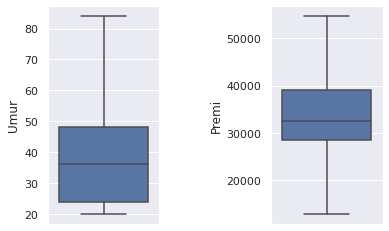

In [ ]:
# Mengecek kembali keberadaan outlier
f, axes = plt.subplots(1, 2)
sns.boxplot(y=cluster['Umur'], ax=axes[0])
sns.boxplot(y=cluster['Premi'], ax=axes[1])
plt.subplots_adjust(wspace=1)

## **Scalling**

In [ ]:
# Dilakukam minmax agar range nilai dari kedua atribut setara
minmax = MinMaxScaler()
cluster = minmax.fit_transform(cluster)
cluster = pd.DataFrame(cluster, columns=['Umur','Premi']) 
cluster.head()

,Umur,Premi
0,0.156250,0.363389
1,0.437500,0.310163
2,0.015625,0.475715
3,0.468750,0.526434
4,0.015625,0.236974


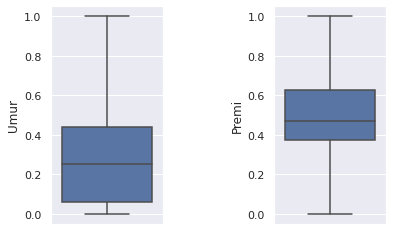

In [ ]:
# Melakukan cek range nilai
f, axes = plt.subplots(1, 2)
sns.boxplot(y=cluster['Umur'], ax=axes[0])
sns.boxplot(y=cluster['Premi'], ax=axes[1])
plt.subplots_adjust(wspace=1)

## **Visualisasi Data**

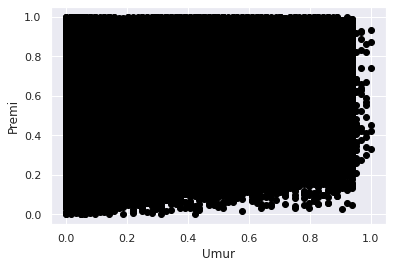

In [ ]:
# Setelah data bersih, maka data divisualisasikan untuk melihat persebarannya sebelum masuk pemodelan
plt.scatter(cluster['Umur'], cluster['Premi'], color = 'black')
plt.xlabel('Umur')
plt.ylabel('Premi')
plt.show()

# **Pemodelan**

## **Fungsi Global**

In [ ]:
# Random titik untuk inisialisasi centroid pertama
def titik_centroids(cluster, k):
    centroids = {
        i + 1 : [random.choices(cluster['Umur']), random.choices(cluster['Premi'])]
        for i in range(k)
    }
    
    return centroids

In [ ]:
# Perhitungan jarak dari data ke titik centroid
def distance(cluster, centroids):
  for i in centroids.keys():
    cluster['distance_from_{}'.format(i)] = (
        np.sqrt(
            (cluster['Umur'] - centroids[i][0]) ** 2 + (cluster['Premi'] - centroids[i][1]) ** 2
        )
    ) # Eucledian distance

  # Pengalokasian data sesuai dengan titik centroid yang terdekat dengan titik data tersebut  
  centroids_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  cluster['closest'] = cluster.loc[:, centroids_distance_cols].idxmin(axis=1)
  cluster['closest'] = cluster['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  cluster['color'] = cluster['closest'].map(lambda x: colmap[x])
  return cluster

In [ ]:
# Update posisi centroids secara terus-menerus sampai menemukan titik centroid yang pas dan tidak akan berubah lagi
def update_centroids(centroids, new_cluster):
  for i in centroids.keys():
    centroids[i][0] = np.mean(new_cluster[new_cluster['closest'] == i]['Umur'])
    centroids[i][1] = np.mean(new_cluster[new_cluster['closest'] == i]['Premi'])
  return centroids

## **KMeans**

Metode yang digunakan untuk clustering yaitu K-Means. Karena, metode ini memiliki ketelitian yang cukup tinggi terhadap ukuran objek, sehingga algoritma ini relative lebih terukur untuk melakukan clustering. Alasan lain yaitu pada clustering ini saya dapat menentukan jumlah cluster yang akan dibentuk.

In [ ]:
# Fungsi KMeans
def cluster_kmeans(i):
  centroids = titik_centroids(cluster, i) # Inisialisasi centroid
  new_cluster = copy.deepcopy(cluster) # Menyalin data dengan membuat duplikat (clone) dari dataframe cluster
  new_cluster = distance(new_cluster, centroids) # Melakukan perhitungan jarak dari data ke titik centroid
  centroids = update_centroids(centroids, new_cluster) # Melakukan update posisi centroid
  while True:
    old_centroids = copy.deepcopy(centroids)
    closest_centroids = new_cluster['closest'].copy(deep=True)
    new_cluster = distance(new_cluster, centroids)
    centroids = update_centroids(centroids, new_cluster)
    # Stopping criteria : Posisi  centroid sebelumnya sama dengan posisi centroid yang baru
    if old_centroids == centroids:
      break
  return centroids, new_cluster

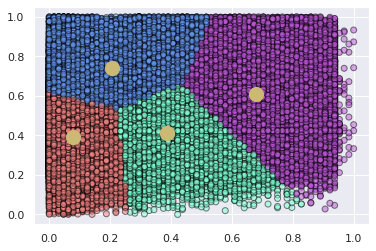

In [ ]:
# Melakukan inisialisasi fungsi cluster_kmeans dengan k = 4
centroids, new_cluster = cluster_kmeans(4)

# Visualisasi fungsi cluster_kmeans dengan k = 4
plt.scatter(new_cluster['Umur'], new_cluster['Premi'], color=new_cluster['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(*centroids[i], color='y', s=200)
plt.show()

# **Evaluasi**

Teknik yang digunakan pada evaluasi adalah Sum Squad Error (SSE) yang dapat melakukan evaluasi terhadap jumlah cluster dari sebuah pengujian data.

## **SSE**

In [ ]:
# Fungsi SSE untuk mendapatkan nilai Sum Squad Error dari jumlah cluster sebanyak k
def sse(new_cluster, centroids):
  sum =  0
  for i in range(len(centroids)):
    x = i + 1
    pici = new_cluster[(new_cluster['closest'] == x)]['distance_from_{}'.format(x)]**2
    sum += pici.sum()
  return sum

In [ ]:
# Melakukan print nilai SSE untuk k = 4
sum = sse(new_cluster, centroids)
print('Nilai SSE dari k = 4 adalah', sum)

Nilai SSE dari k = 4 adalah 5753.356215175495


# **Eksperimen**

Eksperimen yang digunakan adalah melakukan clusterisasi K-Means dengan nilai k yang berbeda, dan dievaluasi agar mendapatkan nilai k yang paling optimum. Untuk pemilihan k yang paling optimum, saya menggunakan Elbow Method. Karena, metode ini membandingkan nilai evaluasi dari sejumlah k yang telah diuji dan saat divisualisasikan grafiknya terlihat garis mengalami patahan yang membentuk siku pada suatu titik.

In [ ]:
# Melakukan perulangan untuk menghitung nilai Sum Squad Error
wcss = []
for i in range(1, 11):
  centroids, new_cluster = cluster_kmeans(i)
  sum = sse(new_cluster, centroids)
  wcss.append(sum)

In [ ]:
# Melakukan print nilai SSE dari setiap nilai k
for j in range(len(wcss)):
  print('Nilai SSE dari k =', j+1, 'adalah', wcss[j])

Nilai SSE dari k = 1 adalah 20430.710631736238
Nilai SSE dari k = 2 adalah 11035.690537068667
Nilai SSE dari k = 3 adalah 7735.398671040911
Nilai SSE dari k = 4 adalah 5753.356215175495
Nilai SSE dari k = 5 adalah 4457.32414621289
Nilai SSE dari k = 6 adalah 3771.863430820814
Nilai SSE dari k = 7 adalah 3165.439158147311
Nilai SSE dari k = 8 adalah 2738.499194226215
Nilai SSE dari k = 9 adalah 2468.746700361599
Nilai SSE dari k = 10 adalah 2221.6591264133317


## **Elbow Method**

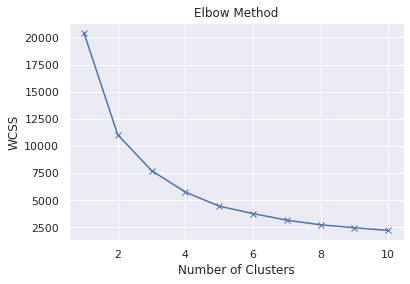

In [ ]:
# Memvisualisasikan grafik elbow method
plt.plot(range(1, 11), wcss, '-bx')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# **Kesimpulan**

Berdasarkan hasil elbow method, didapatkan hasil bahwa jumlah cluster yang paling optimal adalah dua cluster dengan nilai SSE 11035.690536682945. Berikut adalah visualisasinya :

## **k = 2**

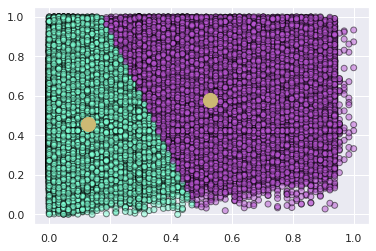

In [ ]:
centroids, new_cluster = cluster_kmeans(2)
plt.scatter(new_cluster['Umur'], new_cluster['Premi'], color=new_cluster['color'], alpha=0.5, edgecolor='black')
for i in centroids:
  plt.scatter(*centroids[i], color='y', s=200)
plt.show()

# **Eksport Dataset**

In [ ]:
from google.colab import files
cluster.to_csv('new_kendaraan.csv', index=False)
files.download('new_kendaraan.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>